### EDA

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [31]:
data = pd.read_excel('data/Telco_customer_churn.xlsx')

In [33]:
data

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason,Income per capita
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer,28320.0
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved,28320.0
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved,28320.0
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved,28320.0
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices,28320.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN,9998.0
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN,NaN


In [34]:
print("Dataset columns: ", list(data))

print("\nCount number of unique values for each column:\n", data.nunique())

print("\nCheck if there is any missing data: \n", data.isnull().sum())

print('\nTotal number of rows: ', len(data))

Dataset columns:  ['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code', 'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value', 'Churn Score', 'CLTV', 'Churn Reason', 'Income per capita']

Count number of unique values for each column:
 CustomerID           7043
Count                   1
Country                 1
State                   1
City                 1129
Zip Code             1652
Lat Long             1652
Latitude             1652
Longitude            1651
Gender                  2
Senior Citizen          2
Partner                 2
Dependents              2
Tenure Months          73
Phone Service           2
Multiple Lines          3
Inter

In [36]:
data.groupby('Churn Label')['CustomerID'].nunique()

Churn Label
No     5174
Yes    1869
Name: CustomerID, dtype: int64

There are missing data in churn reasons because not every customer has filled in

Text(0.5, 1.0, 'Distribution of Customer Churn')

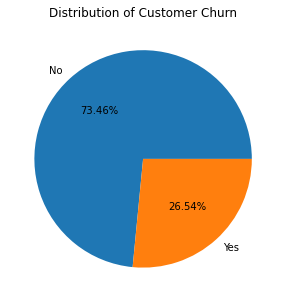

In [7]:
grouped_data=data.groupby('Churn Label')['CustomerID'].nunique()

plt.figure(figsize=(5, 5))
plt.pie(grouped_data, labels=grouped_data.index, autopct='%.2f%%')
plt.title('Distribution of Customer Churn')

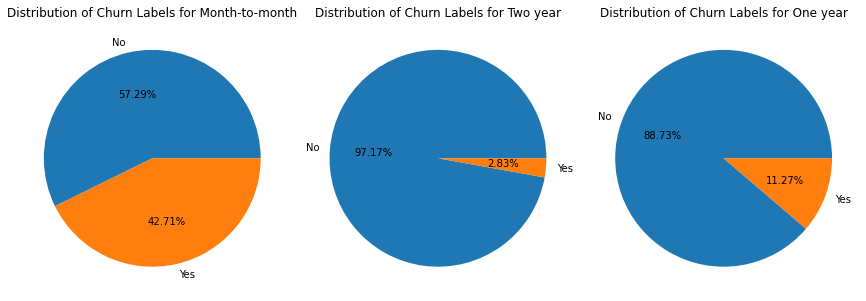

In [8]:
grouped_data = data.groupby(['Churn Label', 'Contract'])['CustomerID'].nunique()

# Plot a pie chart for each 'Contract Type'
contract_types = data['Contract'].unique()

plt.figure(figsize=(12, 6))
for contract_type in contract_types:
    subset_data = grouped_data.loc[:, contract_type]
    plt.subplot(1, len(contract_types), list(contract_types).index(contract_type) + 1)
    plt.pie(subset_data, labels=subset_data.index, autopct='%.2f%%')
    plt.title(f'Distribution of Churn Labels for {contract_type}')

plt.tight_layout()
plt.show()

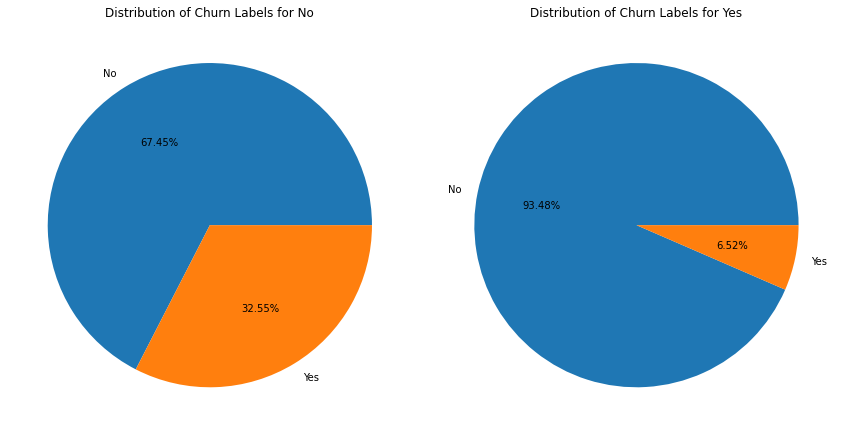

In [9]:
grouped_data = data.groupby(['Churn Label', 'Dependents'])['CustomerID'].nunique()

# Group by 'Churn Label' and 'Dependents' and count unique CustomerIDs
grouped_data = data.groupby(['Churn Label', 'Dependents'])['CustomerID'].nunique()

# Plot a pie chart for each 'Dependent Type'
dependent_types = data['Dependents'].unique()

plt.figure(figsize=(12, 6))
for dependent_type in dependent_types:
    subset_data = grouped_data.loc[:, dependent_type]
    plt.subplot(1, len(dependent_types), list(dependent_types).index(dependent_type) + 1)
    plt.pie(subset_data, labels=subset_data.index, autopct='%.2f%%')
    plt.title(f'Distribution of Churn Labels for {dependent_type}')

plt.tight_layout()
plt.show()

In [10]:
data.groupby(['Count','Country','State'])['CustomerID'].count()

#these 3 columns are all the same, count = 1, country = US, State = California, hence, we will be dropping them
#Churn lavel and churn value is the same, hence, we will be droppiing churn label.

Count  Country        State     
1      United States  California    7043
Name: CustomerID, dtype: int64

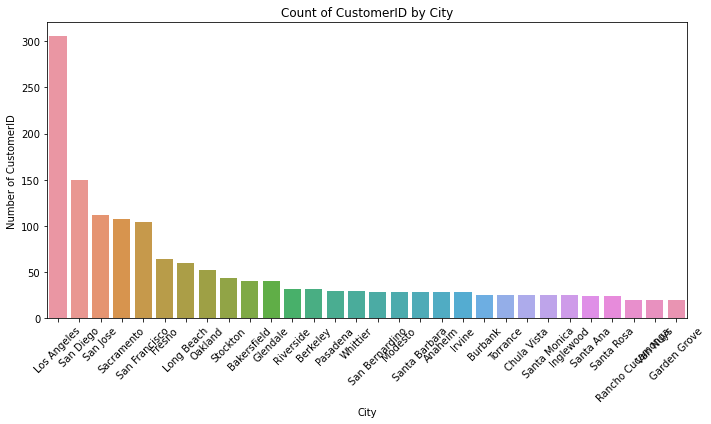

In [12]:
#check for the cities and number of customers there
# Group by Cities and count the unique CustomerIDs
customer_count_by_city = data.groupby('City')['CustomerID'].nunique().reset_index()

# Sort the DataFrame by 'CustomerID' count in descending order
customer_count_by_city_sorted = customer_count_by_city.sort_values(by='CustomerID', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='City', y='CustomerID', data=customer_count_by_city_sorted.head(30))
plt.title('Count of CustomerID by City')
plt.xlabel('City')
plt.ylabel('Number of CustomerID')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

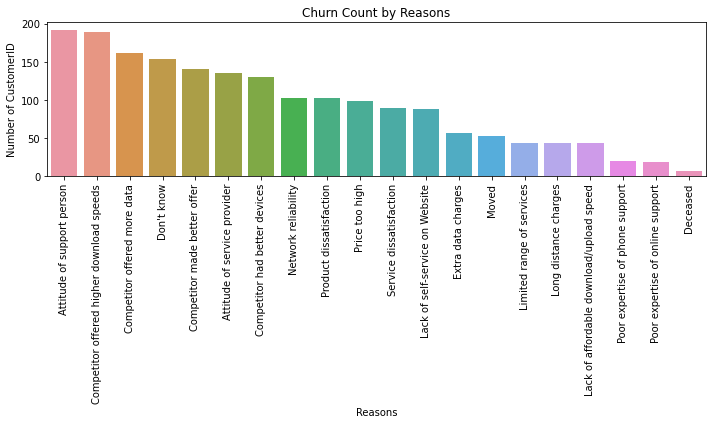

In [13]:
#check for the Reasons and number of customers there
# Group by churn reasons and count the unique CustomerIDs
churned_customer_count_by_reasons = data.groupby('Churn Reason')['CustomerID'].nunique().reset_index()
#churned_customer_count_by_reasons = churned_customer_count_by_reasons.dropna(subset=[churned_customer_count_by_reasons])

# Sort the DataFrame by 'CustomerID' count in descending order
churned_customer_count_by_reasons_sorted = churned_customer_count_by_reasons.sort_values(by='CustomerID', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Churn Reason', y='CustomerID', data=churned_customer_count_by_reasons_sorted)
plt.title('Churn Count by Reasons')
plt.xlabel('Reasons')
plt.ylabel('Number of CustomerID')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [14]:
churned_customer_count_by_reasons

,Churn Reason,CustomerID
0,Attitude of service provider,135
1,Attitude of support person,192
2,Competitor had better devices,130
3,Competitor made better offer,140
4,Competitor offered higher download speeds,189
5,Competitor offered more data,162
6,Deceased,6
7,Don't know,154
8,Extra data charges,57
9,Lack of affordable download/upload speed,44


In [15]:
#remove customers with churning reason as deceased and moved as these is objective reasons
data = data[~data['Churn Reason'].isin(['Deceased', 'Moved'])]

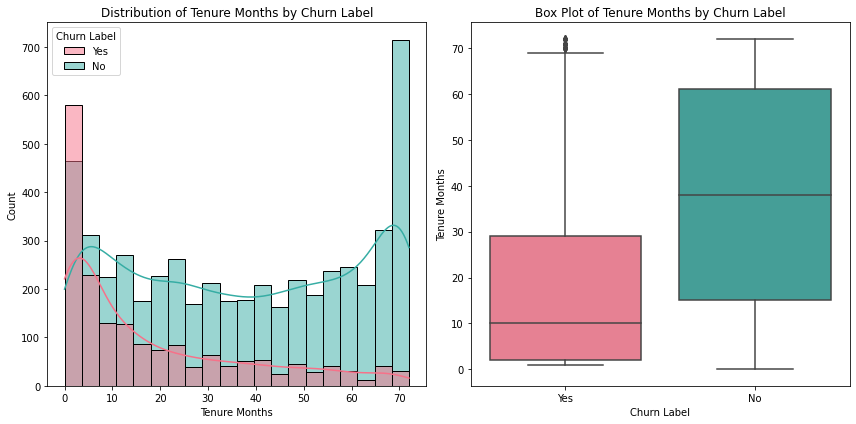

In [16]:
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(data, x='Tenure Months', bins=20, kde=True, hue='Churn Label', palette='husl')
plt.title('Distribution of Tenure Months by Churn Label')

# Box plot
plt.subplot(1, 2, 2)
sns.boxplot(data=data, y='Tenure Months', x='Churn Label', palette='husl')
plt.title('Box Plot of Tenure Months by Churn Label')

plt.tight_layout()
plt.show()

In [35]:
# Check data type of 'Total Charges' column
print("Data Type of 'Total Charges' column:", data['Monthly Charges'].dtype)
data['Total Charges'] = pd.to_numeric(data['Total Charges'], errors='coerce')

#impute missing data for total charges and income per capita
median_total_charges = data['Total Charges'].median()
data['Total Charges'].fillna(median_total_charges, inplace=True)

median_income_per_capita = data['Income per capita'].median()
data['Income per capita'].fillna(median_total_charges, inplace=True)

Data Type of 'Total Charges' column: float64


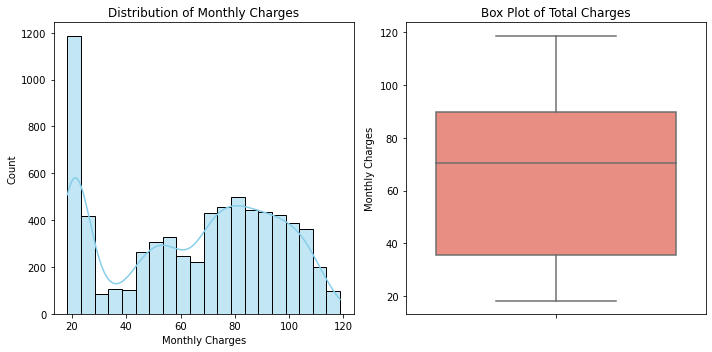

In [17]:
plt.figure(figsize=(10, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(data['Monthly Charges'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Monthly Charges')

# Box plot
plt.subplot(1, 2, 2)
sns.boxplot(y=data['Monthly Charges'], color='salmon')
plt.title('Box Plot of Total Charges')

plt.tight_layout()
plt.show()

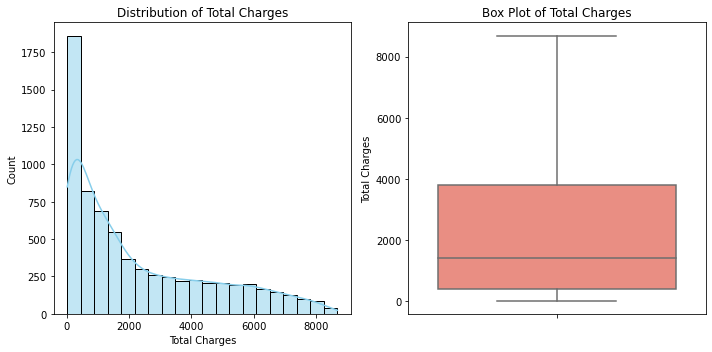

In [18]:
plt.figure(figsize=(10, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(data['Total Charges'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Total Charges')

# Box plot
plt.subplot(1, 2, 2)
sns.boxplot(y=data['Total Charges'], color='salmon')
plt.title('Box Plot of Total Charges')

plt.tight_layout()
plt.show()

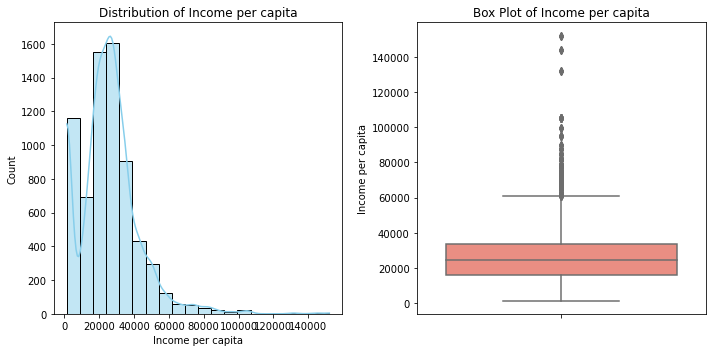

In [19]:
plt.figure(figsize=(10, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(data['Income per capita'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Income per capita')

# Box plot
plt.subplot(1, 2, 2)
sns.boxplot(y=data['Income per capita'], color='salmon')
plt.title('Box Plot of Income per capita')

plt.tight_layout()
plt.show()

In [20]:
continuous_variables = ['Tenure Months','Monthly Charges','Total Charges','Churn Score','CLTV']
# Check data type of 'Total Charges' column
print("Data Type of 'Total Charges' column:", data['Monthly Charges'].dtype)
data['Total Charges'] = pd.to_numeric(data['Total Charges'], errors='coerce')


Data Type of 'Total Charges' column: float64


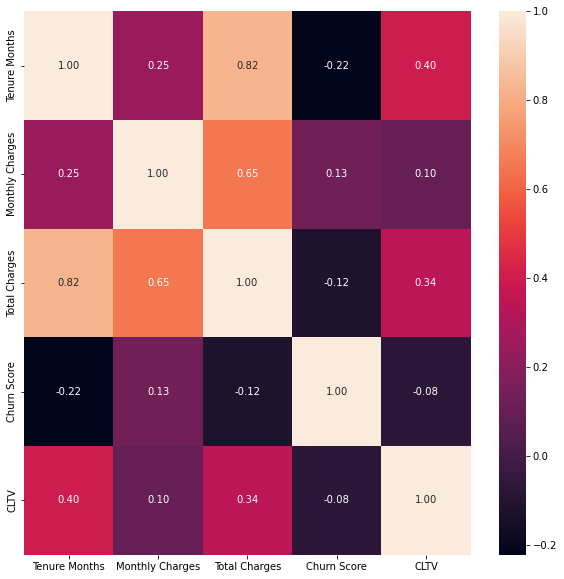

In [21]:
corr = data[continuous_variables].corr()
plt.figure(figsize = (10, 10))
sns.heatmap(corr, annot = True, fmt=".2f")
plt.show()

Strong corrleation between monthly and total charges, consider to drop one of the columns for regression

In [37]:
data

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason,Income per capita
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer,28320.000
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved,28320.000
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Yes,Electronic check,99.65,820.50,Yes,1,86,5372,Moved,28320.000
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved,28320.000
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1,89,5340,Competitor had better devices,28320.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Yes,Bank transfer (automatic),21.15,1419.40,No,0,45,5306,NaN,1397.475
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,Yes,Mailed check,84.80,1990.50,No,0,59,2140,NaN,9998.000
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,Yes,Credit card (automatic),103.20,7362.90,No,0,71,5560,NaN,1397.475
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN,1397.475


### Encode

In [38]:
from sklearn.preprocessing import LabelEncoder

In [39]:
# drop columns less relevant columns
data=data.drop(['Count','Country','State','Zip Code','CustomerID','City','Lat Long','Latitude','Longitude','Churn Label', 'Churn Score', 'Churn Reason'],axis=1)

In [40]:
# Loop through columns and encode categorical variables with 2-4 categories
def encode_data(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

data = data.apply(lambda x: encode_data(x))
data

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,CLTV,Income per capita
0,1,0,0,0,2,1,0,0,2,2,...,0,0,0,1,3,53.85,108.15,1,3239,28320.000
1,0,0,0,1,2,1,0,1,0,0,...,0,0,0,1,2,70.70,151.65,1,2701,28320.000
2,0,0,0,1,8,1,2,1,0,0,...,2,2,0,1,2,99.65,820.50,1,5372,28320.000
3,0,0,1,1,28,1,2,1,0,0,...,2,2,0,1,2,104.80,3046.05,1,5003,28320.000
4,1,0,0,1,49,1,2,1,0,2,...,2,2,0,1,0,103.70,5036.30,1,5340,28320.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,0,72,1,0,2,1,1,...,1,1,2,1,0,21.15,1419.40,0,5306,1397.475
7039,1,0,1,1,24,1,2,0,2,0,...,2,2,1,1,3,84.80,1990.50,0,2140,9998.000
7040,0,0,1,1,72,1,2,1,0,2,...,2,2,1,1,1,103.20,7362.90,0,5560,1397.475
7041,0,0,1,1,11,0,1,0,2,0,...,0,0,0,1,2,29.60,346.45,0,2793,1397.475


In [41]:
# feature scaling for columns to ensure columns are at the same scale
cols = ['Tenure Months','Monthly Charges','Total Charges','CLTV','Income per capita']

data[cols] = pd.DataFrame(StandardScaler().fit_transform(data[cols].astype('float64')),
                       columns=cols)
data

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,CLTV,Income per capita
0,1,0,0,0,-1.236724,1,0,0,2,2,...,0,0,0,1,3,-0.362660,-0.959674,1,-0.981675,0.171608
1,0,0,0,1,-1.236724,1,0,1,0,0,...,0,0,0,1,2,0.197365,-0.940470,1,-1.436462,0.171608
2,0,0,0,1,-0.992402,1,2,1,0,0,...,2,2,0,1,2,1.159546,-0.645186,1,0.821409,0.171608
3,0,0,1,1,-0.177995,1,2,1,0,0,...,2,2,0,1,2,1.330711,0.337349,1,0.509483,0.171608
4,1,0,0,1,0.677133,1,2,1,0,2,...,2,2,0,1,0,1.294151,1.216004,1,0.794358,0.171608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,0,1.613701,1,0,2,1,1,...,1,1,2,1,0,-1.449476,-0.380784,0,0.765617,-1.384930
7039,1,0,1,1,-0.340876,1,2,0,2,0,...,2,2,1,1,3,0.665992,-0.128655,0,-1.910691,-0.887687
7040,0,0,1,1,1.613701,1,2,1,0,2,...,2,2,1,1,1,1.277533,2.243151,0,0.980330,-1.384930
7041,0,0,1,1,-0.870241,0,1,0,2,0,...,0,0,0,1,2,-1.168632,-0.854469,0,-1.358692,-1.384930


In [43]:
data.to_csv('data/final_data.csv', index=False)